<a href="https://colab.research.google.com/github/NehaJadhav11-ui/E.D.G.E-2025-/blob/main/PropWise_Final_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  PropWise: Data-Driven Property Price Prediction and Market Insights
# E.D.G.E 2025

**Course:** TY BSc Data Science and Big Data Analytics
**Members:**
- Neha Jadhav — PRN: 1132230022 (Team Leader)
- Sneha Patil — PRN: 1132230347

---


PROJECT OVERVIEW

This project, PropWise, is designed as a single, comprehensive study in real estate data analysis. It utilizes two distinct datasets (Dataset 1: Focused on Prediction and Dataset 2: Focused on Market Features) to achieve both a robust predictive model and deep market understanding (insights).

The entire project code is structured into two integrated sections:

Part A: Property Price Prediction Modeling
Focus: Developing, training, and evaluating Machine Learning models.
Data Usage: This section primarily relies on Dataset 1, which is used to accurately forecast the price per unit area of properties.
Part B: Exploratory Data Analysis (EDA) and Market Insights
Focus: Data cleaning, visualization, and extracting key market trends.
Data Usage: This section leverages both Dataset 1 and Dataset 2 to comprehensively understand the influence of property features and various market factors.

Part A: Property Price Prediction Modeling

In [ ]:
import numpy as np
import pandas as pd
import re, warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

warnings.filterwarnings("ignore")
RANDOM_STATE = 42

### **Step 2: Load dataset**

In [ ]:
# Load directly from the compressed file
df = pd.read_csv("Makaan_Properties_Buy.csv", compression='zip', encoding='latin-1')

print("Shape:", df.shape)
df.head()

Shape: (332096, 32)


,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


### **Step 3: Data Cleaning & Preprocessing**

In [ ]:

data = df.copy()

# Clean "Price_per_unit_area" column (remove commas, convert to numeric)
data["Price_per_unit_area"] = data["Price_per_unit_area"].astype(str).str.replace(",", "")
data["Price_per_unit_area"] = pd.to_numeric(data["Price_per_unit_area"], errors="coerce")

# Drop rows where target is missing
data = data.dropna(subset=["Price_per_unit_area"])

# Select relevant features (X) and target (y)
features = [
    "Property_type",
    "Property_status",
    "is_furnished",
    "is_RERA_registered",
    "is_ready_to_move",
    "is_commercial_Listing"
]

X = data[features]
y = data["Price_per_unit_area"]

print("Shape after cleaning:", X.shape, y.shape)


X.head()


Shape after cleaning: (332096, 6) (332096,)


,Property_type,Property_status,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing
0,Apartment,Under Construction,Unfurnished,True,False,False
1,Apartment,Under Construction,Unfurnished,True,False,False
2,Apartment,Ready to move,Unfurnished,False,True,False
3,Apartment,Ready to move,Unfurnished,False,True,False
4,Apartment,Under Construction,Unfurnished,True,False,False


In [ ]:
print("Shape of dataset : ", df.shape)

print("\nColumn Available : ")
print(list(df.columns))

print("\n--- First 5 roms ---")
display(df.head())

print("\nMissing values per column (Top 15) : ")
display(df.isnull().sum().sort_values(ascending = False).head(15))

print("\Data types summary : ")
print(df.dtypes.value_counts())

# Quick look at unique values for key columns
for col in ["Price_per_unit_ares", "City", "Property_type", "Property_status", "is_furnished"] :
    if col in df.columns:
        print(f"\nUnique sample values from '{col}' :")
        print(df[col].dropna().astype(str).unique()[:10])


Shape of dataset :  (332096, 32)

Column Available : 
['Property_Name', 'Property_id', 'Property_type', 'Property_status', 'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id', 'Builder_name', 'Property_building_status', 'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude', 'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description', 'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing', 'is_PentaHouse', 'is_studio', 'Listing_Category']

--- First 5 roms ---


,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell



Missing values per column (Top 15) : 


builder_id               182118
Builder_name             182118
Property_Name            114270
Property_status           60442
Locality_Name                 2
description                   1
is_plot                       0
Sub_urban_name                0
is_furnished                  0
listing_domain_score          0
is_Apartment                  0
is_RERA_registered            0
Size                          0
is_ready_to_move              0
is_commercial_Listing         0
dtype: int64

\Data types summary : 
object     17
bool        7
int64       4
float64     4
Name: count, dtype: int64

Unique sample values from 'Property_type' :
['Apartment' 'Independent House' 'Villa' 'Independent Floor'
 'Residential Plot']

Unique sample values from 'Property_status' :
['Under Construction' 'Ready to move']

Unique sample values from 'is_furnished' :
['Unfurnished' 'Semi-Furnished' 'Furnished']


In [ ]:
# 1. Clean Price_per_unit_area(remove commas, convert to numeric)
df["Price_per_unit_area"] = df["Price_per_unit_area"].astype(str).str.replace(",", "")
df["Price_per_unit_area"] = pd.to_numeric(df["Price_per_unit_area"], errors = "coerce")

# 2. Standardize furnishing column (capitalize properly)
if "is_furnished" in df.columns :
    df["is_furnished"] = df["is_furnished"].str.strip().str.title()

# 3. Select subset of useful columns for analysis
eda_df = df[[
    "City_name", "Locality_Name", "Property_type", "Property_status",
    "No_of_BHK", "Size", "Price_per_unit_area", "is_furnished"
]]

print("Shape of EDA DataFrame :", eda_df.shape)
display(eda_df[["No_of_BHK", "Size", "Price_per_unit_area"]].describe().round(2))

# Check unique values after cleaning
print("\nUnique Property Status : ", eda_df["Property_status"].unique())
print("Unique Furnishing Types : ", eda_df["is_furnished"].unique())
print("Unique Property Types : ", eda_df["Property_type"].unique())

Shape of EDA DataFrame : (332096, 8)


,Price_per_unit_area
count,332096.00
mean,8650.01
std,10902.35
min,0.00
25%,2999.00
50%,5571.00
75%,10114.25
max,200000.00



Unique Property Status :  ['Under Construction' 'Ready to move' nan]
Unique Furnishing Types :  ['Unfurnished' 'Semi-Furnished' 'Furnished']
Unique Property Types :  ['Apartment' 'Independent House' 'Villa' 'Independent Floor'
 'Residential Plot']


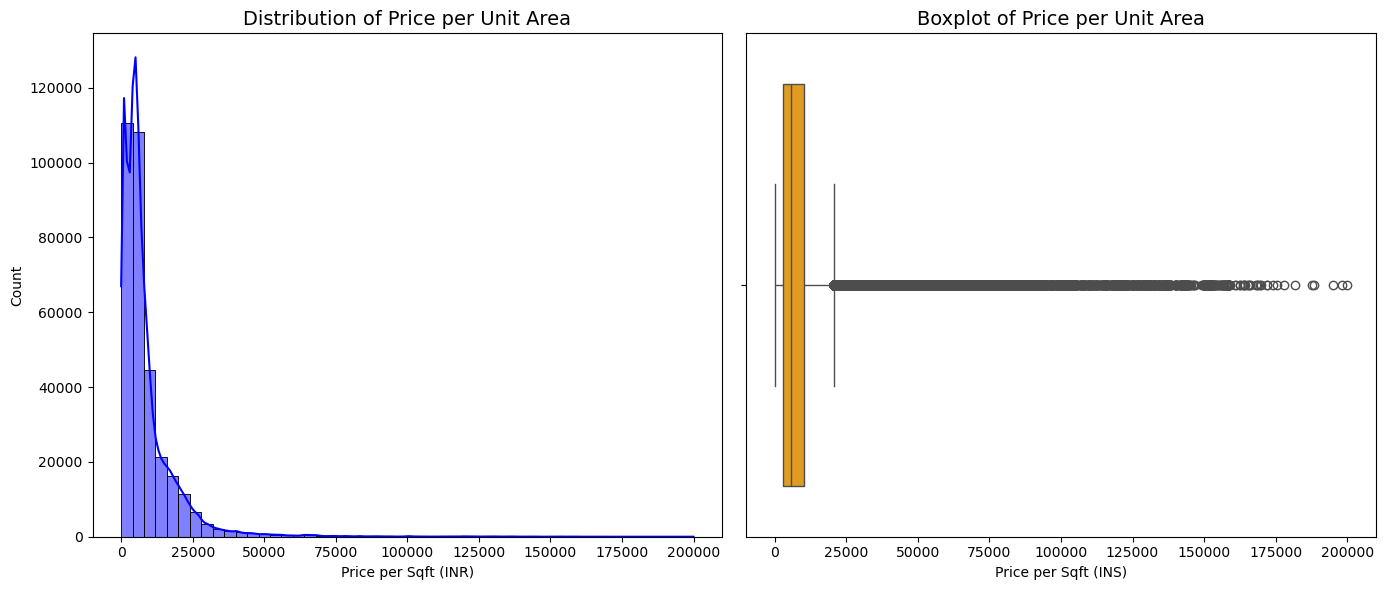

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(eda_df["Price_per_unit_area"].dropna(), bins = 50, kde = True, color = "blue")
plt.title("Distribution of Price per Unit Area", fontsize = 14)
plt.xlabel("Price per Sqft (INR)")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x = eda_df["Price_per_unit_area"], color = "orange")
plt.title("Boxplot of Price per Unit Area", fontsize = 14)
plt.xlabel("Price per Sqft (INS)")

plt.tight_layout()
plt.show()

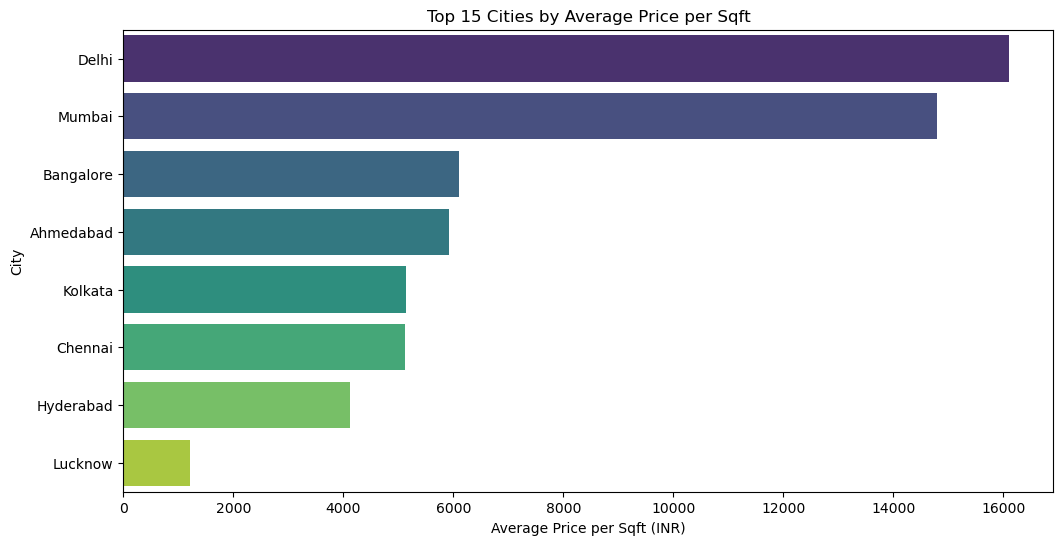

City_name
Delhi        16106.861068
Mumbai       14802.834893
Bangalore     6100.476089
Ahmedabad     5913.004100
Kolkata       5135.602324
Chennai       5129.612309
Hyderabad     4128.538589
Lucknow       1212.393858
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Group by city and calculate avg price per unit area
city_prices = eda_df.groupby("City_name")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot top 15 cities by avg price per sqft
plt.figure(figsize = (12, 6))
sns.barplot(x = city_prices.head(15), y = city_prices.head(15).index, palette = "viridis")
plt.title("Top 15 Cities by Average Price per Sqft")
plt.xlabel("Average Price per Sqft (INR)")
plt.ylabel("City")

plt.show()

city_prices.head(15)

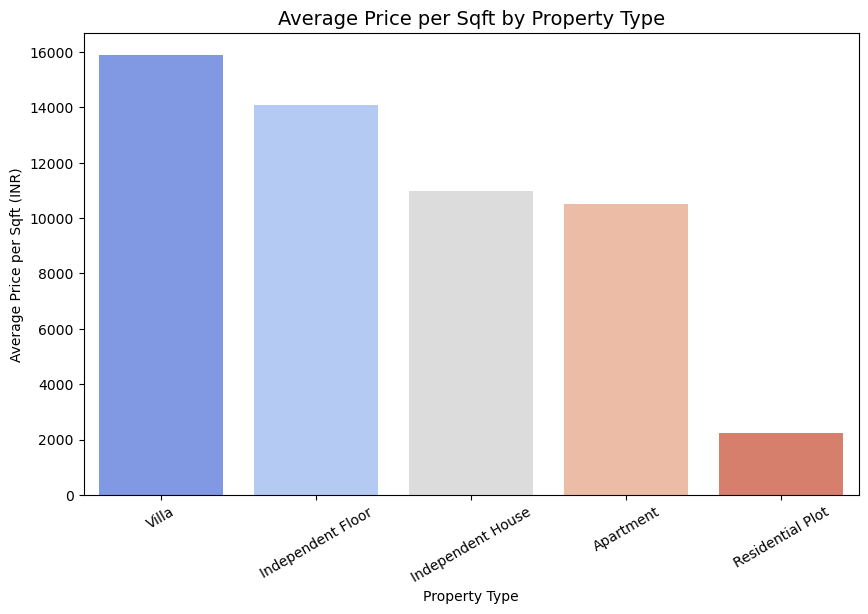

Property_type
Villa                15901.167719
Independent Floor    14103.806110
Independent House    10986.596252
Apartment            10508.992251
Residential Plot      2226.185976
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Group by property type and calculate avg price
type_prices = eda_df.groupby("Property_type")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = type_prices.index, y = type_prices.values, palette = "coolwarm")
plt.title("Average Price per Sqft by Property Type", fontsize = 14)
plt.ylabel("Average Price per Sqft (INR)")
plt.xlabel("Property Type")
plt.xticks(rotation = 30)
plt.show()

type_prices

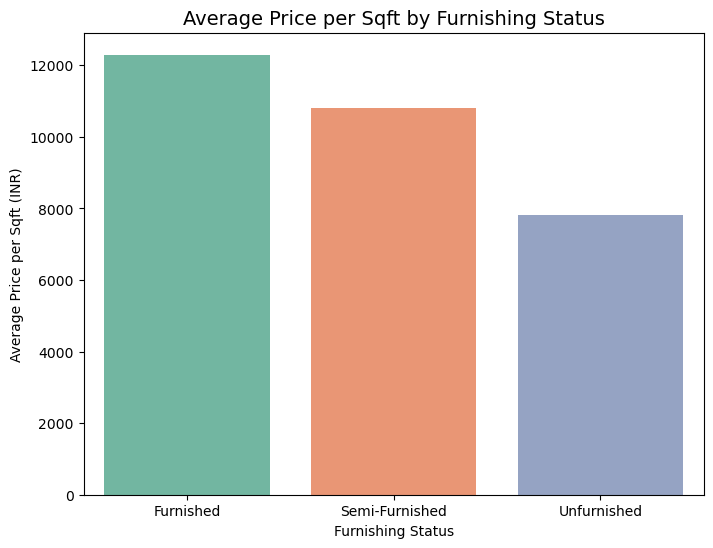

is_furnished
Furnished         12297.466190
Semi-Furnished    10805.681824
Unfurnished        7806.373944
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Groupby furnishing status and calculate avg price
furnish_prices = eda_df.groupby("is_furnished")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot
plt.figure(figsize = (8, 6))
sns.barplot(x = furnish_prices.index, y = furnish_prices.values, palette = "Set2")
plt.title("Average Price per Sqft by Furnishing Status", fontsize = 14)
plt.ylabel("Average Price per Sqft (INR)")
plt.xlabel("Furnishing Status")
plt.show()

furnish_prices

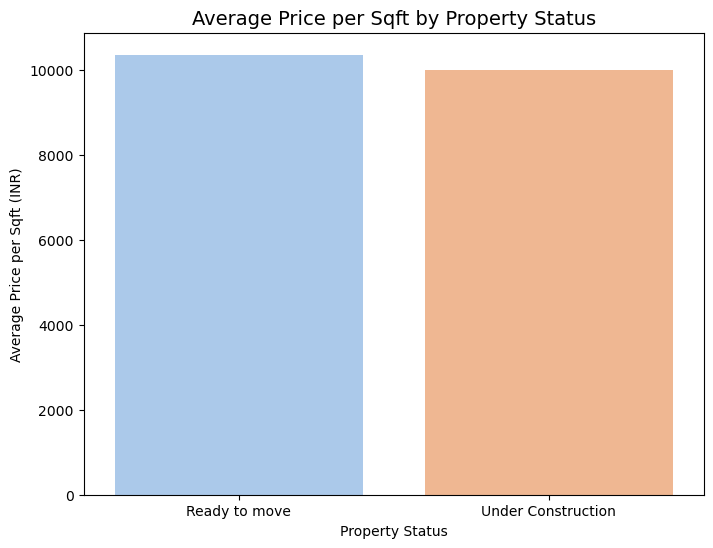

Property_status
Ready to move         10353.222686
Under Construction     9998.848183
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Group by property status and calculate avg price
status_prices = eda_df.groupby("Property_status")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot
plt.figure(figsize = (8, 6))
sns.barplot(x = status_prices.index, y = status_prices.values, palette = "pastel")
plt.title("Average Price per Sqft by Property Status", fontsize = 14)
plt.ylabel("Average Price per Sqft (INR)")
plt.xlabel("Property Status")
plt.show()

status_prices

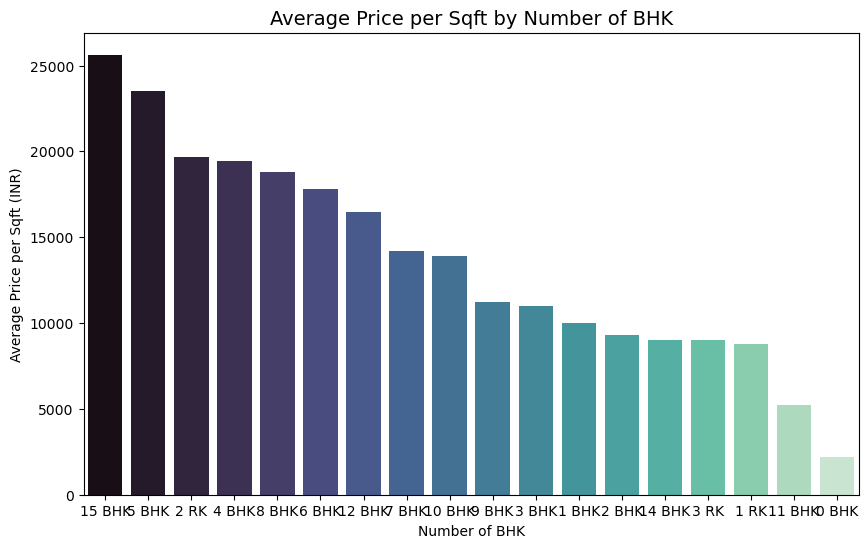

No_of_BHK
15 BHK    25628.533333
5 BHK     23531.123471
2 RK      19676.000000
4 BHK     19465.124484
8 BHK     18774.707031
6 BHK     17826.032787
12 BHK    16453.000000
7 BHK     14197.264331
10 BHK    13895.865443
9 BHK     11201.981366
3 BHK     10982.195078
1 BHK     10030.765738
2 BHK      9302.387327
14 BHK     9000.000000
3 RK       8999.000000
1 RK       8796.878560
11 BHK     5245.071429
0 BHK      2226.185976
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Group by number of BHK and calculate avg price
bhk_prices = eda_df.groupby("No_of_BHK")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(x = bhk_prices.index, y = bhk_prices.values, palette = "mako")
plt.title("Average Price per Sqft by Number of BHK", fontsize = 14)
plt.ylabel("Average Price per Sqft (INR)")
plt.xlabel("Number of BHK")
plt.show()

bhk_prices

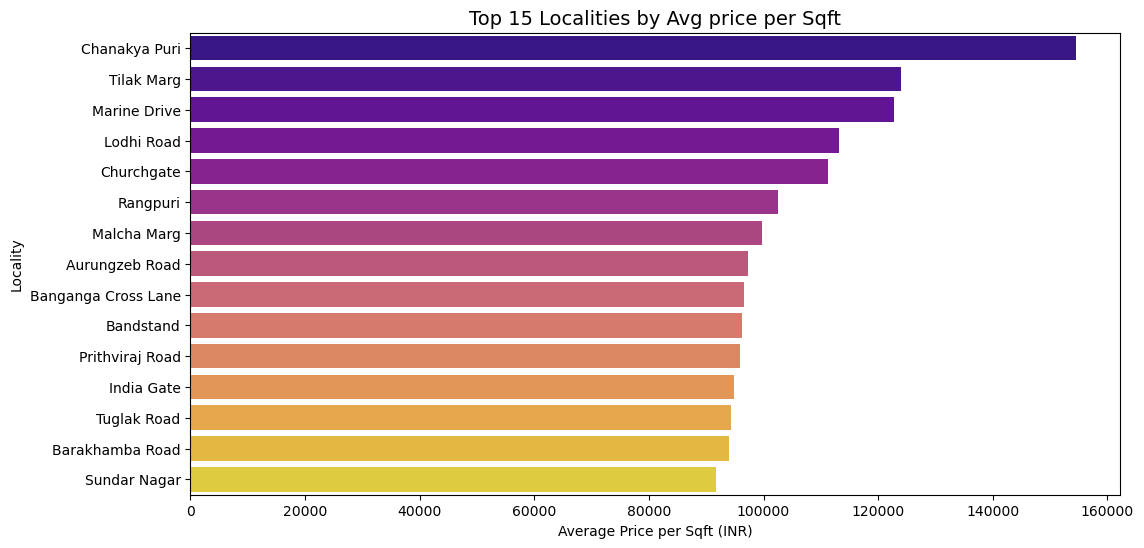

Locality_Name
Chanakya Puri          154545.000000
Tilak Marg             123929.000000
Marine Drive           122692.882353
Lodhi Road             113228.750000
Churchgate             111224.687500
Rangpuri               102500.000000
Malcha Marg             99821.093750
Aurungzeb Road          97346.693548
Banganga Cross Lane     96666.000000
Bandstand               96296.000000
Prithviraj Road         95899.131579
India Gate              94898.571429
Tuglak Road             94381.533333
Barakhamba Road         93892.800000
Sundar Nagar            91770.750000
Name: Price_per_unit_area, dtype: float64

In [ ]:
# Group by Locality and calculate avg price
locality_prices = eda_df.groupby("Locality_Name")["Price_per_unit_area"].mean().sort_values(ascending = False)

# Plot top 15 localities
plt.figure(figsize = (12, 6))
sns.barplot(x = locality_prices.head(15).values, y = locality_prices.head(15).index, palette = "plasma")
plt.title("Top 15 Localities by Avg price per Sqft", fontsize = 14)
plt.xlabel("Average Price per Sqft (INR)")
plt.ylabel("Locality")
plt.show()

locality_prices.head(15)

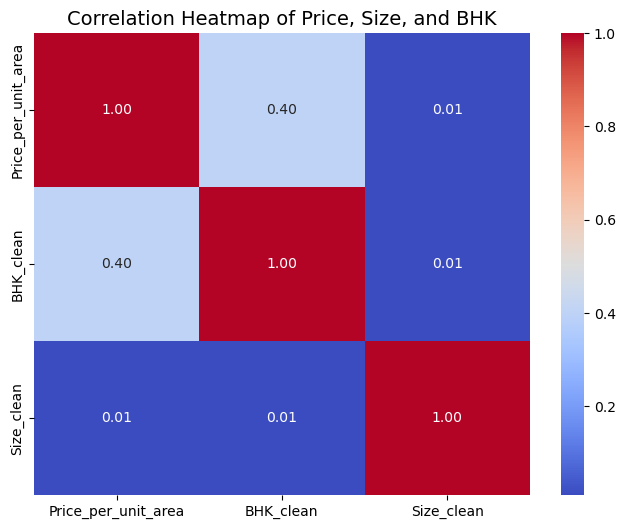

,Price_per_unit_area,BHK_clean,Size_clean
Price_per_unit_area,1.000000,0.402671,0.009114
BHK_clean,0.402671,1.000000,0.012292
Size_clean,0.009114,0.012292,1.000000


In [ ]:
# Clean No_of_BHK (extract numbers)
eda_df["BHK_clean"] = eda_df["No_of_BHK"].astype(str).str.extract(r'(\d+)').astype(float)

# Clean Size (extract numbers)
eda_df["Size_clean"] = eda_df["Size"].astype(str).str.replace(",", "").str.extract(r'(\d+)').astype(float)

# Select numeric columns
num_cols = eda_df[["Price_per_unit_area", "BHK_clean", "Size_clean"]]

# Compute correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", cbar = True)
plt.title("Correlation Heatmap of Price, Size, and BHK", fontsize = 14)
plt.show()

corr

### **Step 1: Train-Test Split & Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Separate categorical and numeric features
categorical_features = ["Property_type", "Property_status", "is_furnished"]
numeric_features = ["is_RERA_registered", "is_ready_to_move", "is_commercial_Listing"]

# Preprocessing:
# - OneHotEncode categorical
# - StandardScale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (265676, 6) Test shape: (66420, 6)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate model performance
def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f" {name} Performance:")
    print(f"   MAE  : {mae:.2f}")
    print(f"   RMSE : {rmse:.2f}")
    print(f"   R2 : {r2:.4f}")
    print("-"*40)
    return mae, rmse, r2


# 1. Linear Regression

lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
evaluate_model("Linear Regression", lr_pipeline, X_test, y_test)


# 2. Random Forest Regressor

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1))
])

rf_pipeline.fit(X_train, y_train)
evaluate_model("Random Forest", rf_pipeline, X_test, y_test)

📊 Linear Regression Performance:
   MAE  : 5384.51
   RMSE : 9860.18
   R2 : 0.1723
----------------------------------------
📊 Random Forest Performance:
   MAE  : 5198.22
   RMSE : 9479.58
   R2 : 0.2350
----------------------------------------


(5198.224860578742, 9479.57507415268, 0.23498446934967165)

In [ ]:
import joblib

# Save the Random Forest model (best performer usually)
joblib.dump(rf_pipeline, "estatex_price_model_rf.pkl")

# Save the Linear Regression model as well (baseline)
joblib.dump(lr_pipeline, "estatex_price_model_lr.pkl")

print("Models saved successfully as 'estatex_price_model_rf.pkl' and 'estatex_price_model_lr.pkl'")

Models saved successfully as 'estatex_price_model_rf.pkl' and 'estatex_price_model_lr.pkl'


In [ ]:
# Load model later
rf_model = joblib.load("estatex_price_model_rf.pkl")

# Example prediction (using a single sample from test set)
sample = X_test.iloc[0:1]
pred_price = rf_model.predict(sample)
print("Predicted Price per unit area:", pred_price)

Predicted Price per unit area: [11445.52671587]


## **Part B: Exploratory Data Analysis (EDA) and Market Insights**

In [ ]:
# Load CSV file
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("QINN368BIS.csv")


Saving QINN368BIS.csv to QINN368BIS.csv


In [ ]:
import pandas as pd
df = pd.read_csv("QINN368BIS.csv")
df.head()


,observation_date,QINN368BIS
0,2010-01-01,18.5000
1,2010-04-01,19.4286
2,2010-07-01,21.3285
3,2010-10-01,16.2762
4,2011-01-01,19.7527


In [ ]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Data types and null values
print(df.info())

# Summary statistics
df.describe().T


Rows, Columns: (61, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  61 non-null     object 
 1   QINN368BIS        61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None


,count,mean,std,min,25%,50%,75%,max
QINN368BIS,61.0,9.809213,7.541949,1.1038,3.3556,7.2024,15.8349,26.2576


In [ ]:
# Check missing values
df.isnull().sum()

# Option 1: Fill numerical missing values with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Option 2: Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)


Before removing duplicates: (61, 2)
After removing duplicates: (61, 2)


In [ ]:
# Convert date columns if any (example: 'date')
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


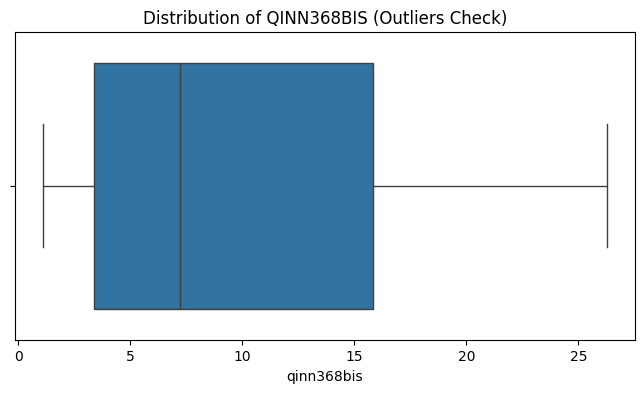

In [ ]:
# Example: Detect outliers in 'qinn368bis'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['qinn368bis'])
plt.title("Distribution of QINN368BIS (Outliers Check)")
plt.show()

# Cap outliers using IQR method
Q1 = df['qinn368bis'].quantile(0.25)
Q3 = df['qinn368bis'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['qinn368bis'] = np.where(df['qinn368bis'] < lower, lower, df['qinn368bis'])
df['qinn368bis'] = np.where(df['qinn368bis'] > upper, upper, df['qinn368bis'])

In [ ]:
# Example: Extract year, month from date
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month


In [ ]:
# Save preprocessed dataset
df.to_csv("cleaned_real_estate.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


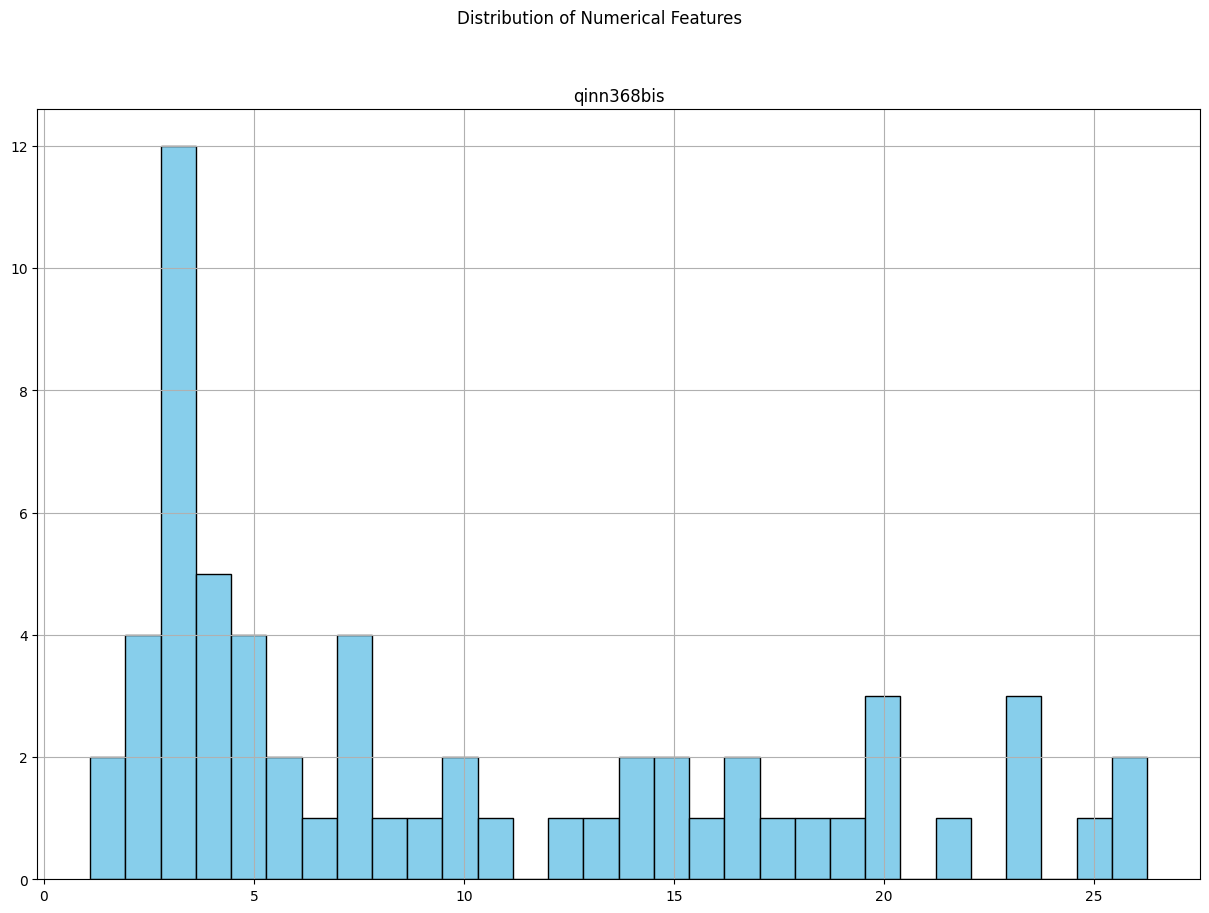

In [ ]:
# EDA: Univariate Analysis (Numerical)
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

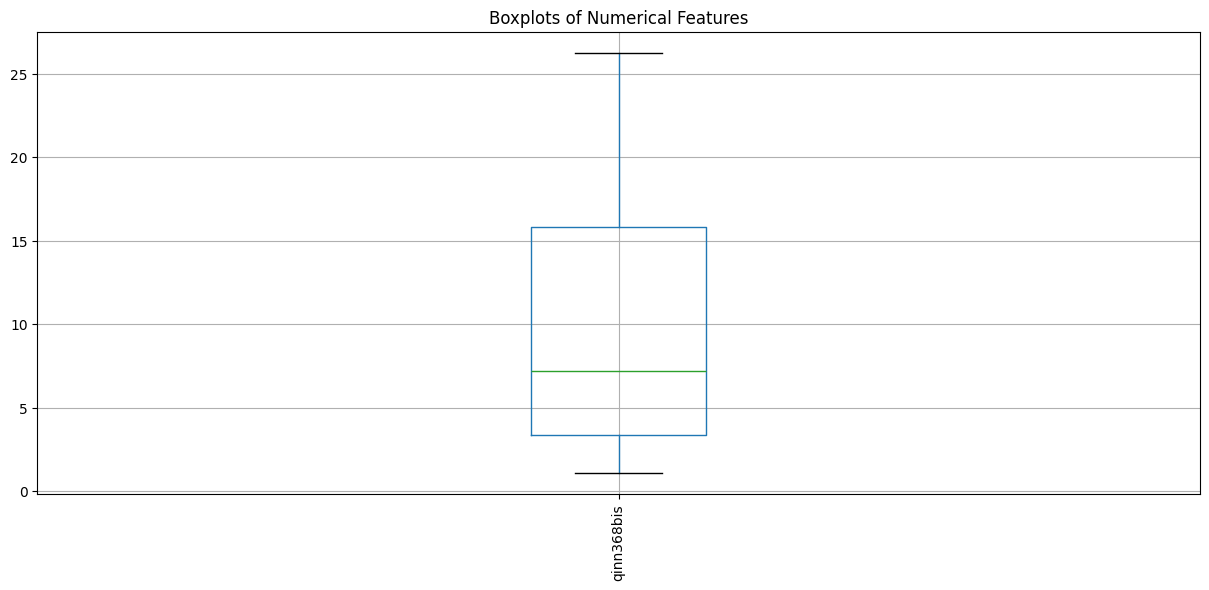

In [ ]:
# EDA: Outlier Detection with Boxplots
plt.figure(figsize=(15, 6))
df.boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()


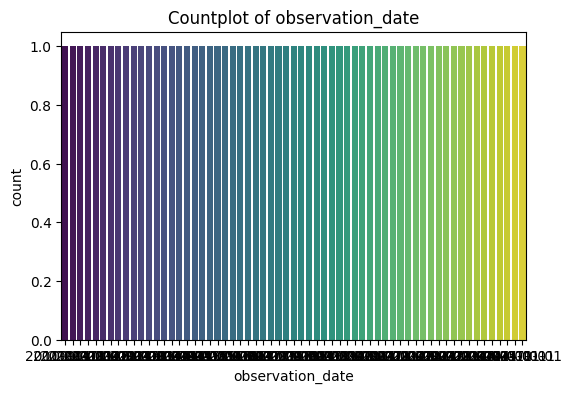

In [ ]:
# EDA: Countplots for Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.show()


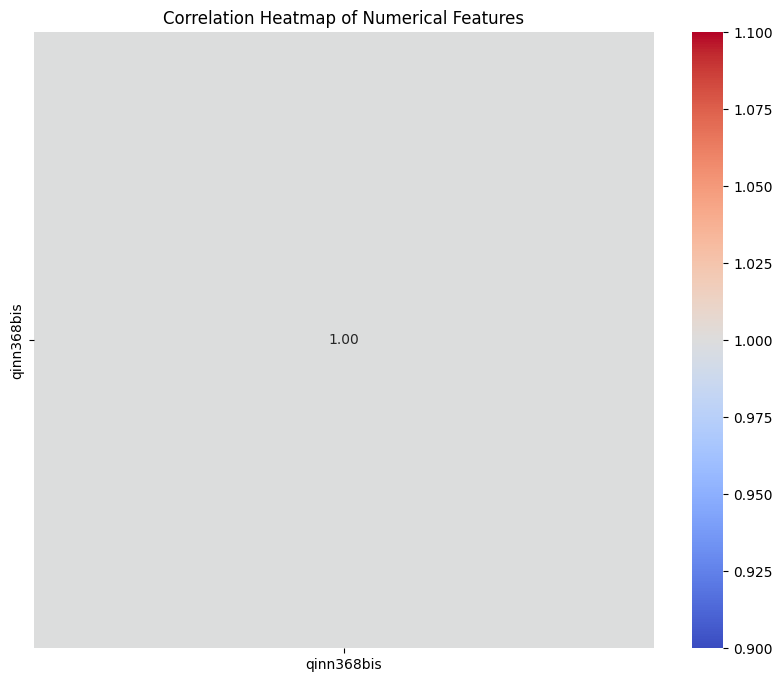

In [ ]:
# EDA: Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


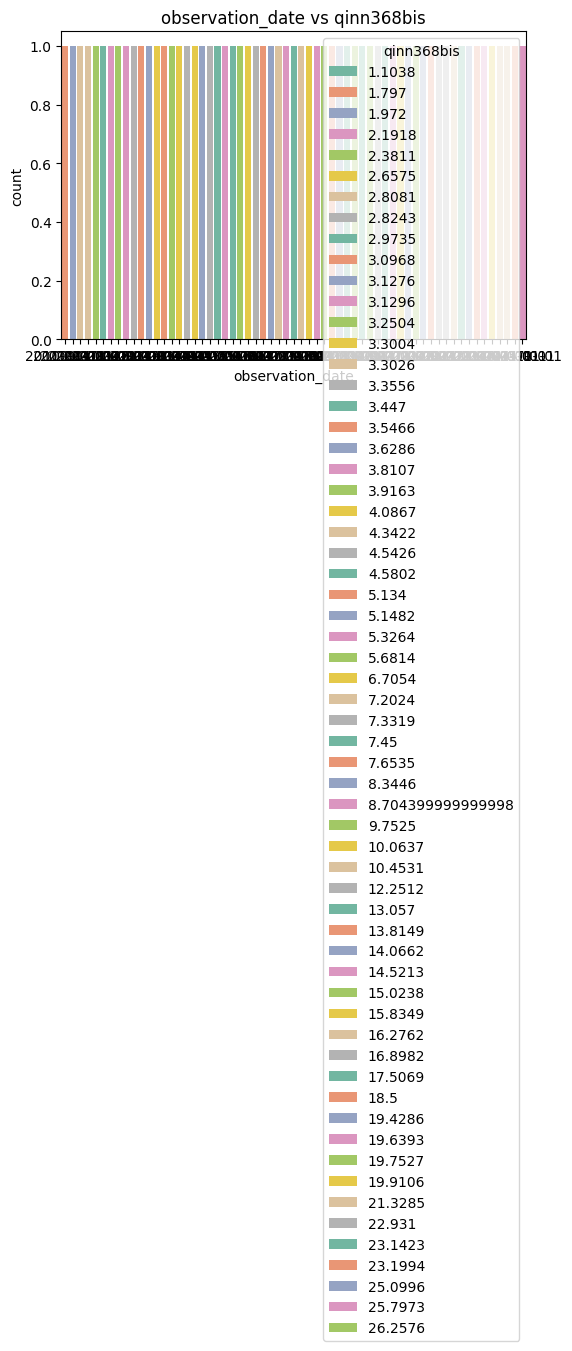

In [ ]:
# EDA: Feature vs Target Analysis
target = "qinn368bis"  # <<< Replace with actual target column

# Numerical vs Target
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs {target}")
        plt.show()

# Categorical vs Target
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df[target], palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()

In [ ]:
# Feature Matrix (X) and Target Vector (y)
target = "qinn368bis"   # <<< Replace with actual target column

# Convert 'observation_date' to datetime and extract numerical features
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['year'] = df['observation_date'].dt.year
df['month'] = df['observation_date'].dt.month

X = df.drop(columns=[target, 'observation_date'])
y = df[target]



# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Check dataset shapes after train-test split
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

# Check target distribution (to confirm stratify worked)
print("\nTarget distribution in Training set:")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution in Test set:")
print(y_test.value_counts(normalize=True))


X_train shape: (48, 2)
X_test shape : (13, 2)
y_train shape: (48,)
y_test shape : (13,)

Target distribution in Training set:
qinn368bis
16.2762    0.020833
5.1482     0.020833
15.8349    0.020833
25.7973    0.020833
19.6393    0.020833
2.8243     0.020833
19.7527    0.020833
2.6575     0.020833
16.8982    0.020833
3.1276     0.020833
4.5802     0.020833
7.3319     0.020833
3.3026     0.020833
10.0637    0.020833
4.3422     0.020833
8.3446     0.020833
22.9310    0.020833
7.4500     0.020833
3.6286     0.020833
7.6535     0.020833
3.3004     0.020833
2.1918     0.020833
25.0996    0.020833
6.7054     0.020833
3.5466     0.020833
4.0867     0.020833
3.4470     0.020833
8.7044     0.020833
1.9720     0.020833
19.4286    0.020833
14.5213    0.020833
21.3285    0.020833
1.7970     0.020833
2.9735     0.020833
5.1340     0.020833
9.7525     0.020833
4.5426     0.020833
23.1994    0.020833
13.0570    0.020833
14.0662    0.020833
3.1296     0.020833
17.5069    0.020833
26.2576    0.020833
1.1

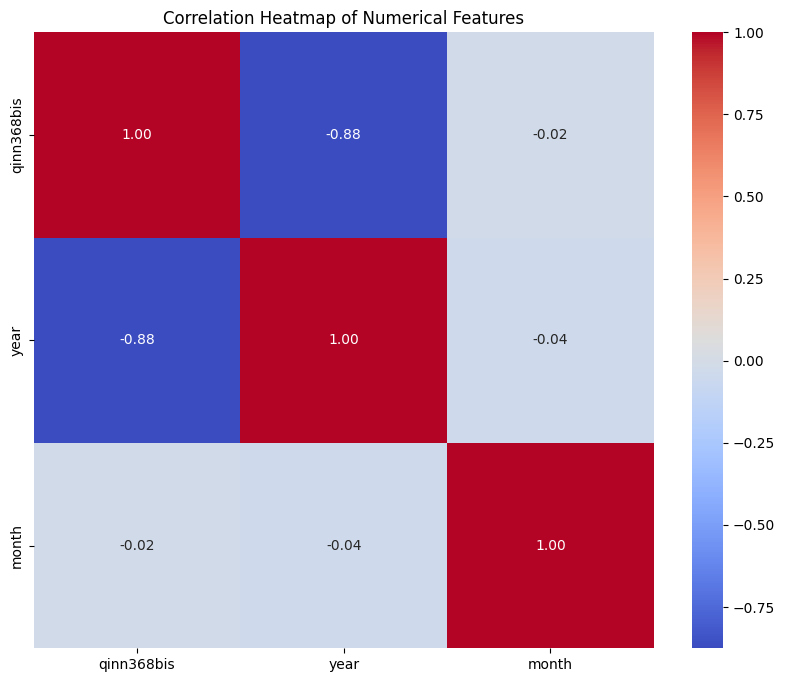

In [ ]:
# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Import Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, r2_score

# Function to train & evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("="*60)
    return r2

# Initialize models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR()
]

# Evaluate all models
results = {}
for model in models:
    r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model.__class__.__name__] = r2

Model: LinearRegression
Mean Absolute Error: 2.8170803238609428
R-squared: 0.8144652210402682
Model: DecisionTreeRegressor
Mean Absolute Error: 1.7302461538461533
R-squared: 0.9018597181355814
Model: RandomForestRegressor
Mean Absolute Error: 1.4856140769230788
R-squared: 0.9227404794409533
Model: KNeighborsRegressor
Mean Absolute Error: 1.5610907692307687
R-squared: 0.9101350965961083
Model: SVR
Mean Absolute Error: 5.770205299600292
R-squared: -0.08407520820253134


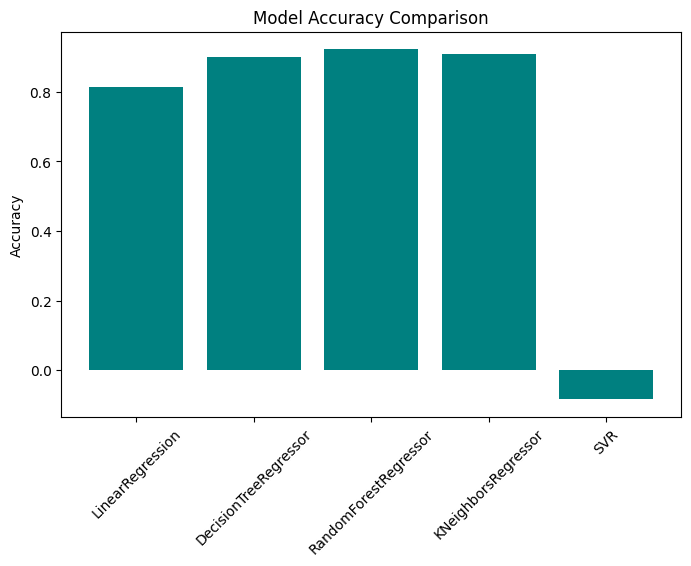

In [ ]:
# Compare model performance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="teal")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#  Clean and save dataset again (if not already done)
import pandas as pd
df = pd.read_csv("QINN368BIS.csv")

# Convert date and handle missing values
if 'observation_date' in df.columns:
    df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')
    df['year'] = df['observation_date'].dt.year
    df['month'] = df['observation_date'].dt.month
    df['day'] = df['observation_date'].dt.day

df.fillna(df.median(numeric_only=True), inplace=True)
df.to_csv("cleaned_real_estate.csv", index=False)

print(" Cleaned dataset saved as cleaned_real_estate.csv")


 Cleaned dataset saved as cleaned_real_estate.csv


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd


if 'observation_date' in df.columns:
    df['observation_date'] = pd.to_datetime(df['observation_date'], errors='coerce')
    df['year'] = df['observation_date'].dt.year
    df['month'] = df['observation_date'].dt.month
    df['day'] = df['observation_date'].dt.day

elif 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

# Identify target and features
target_col = 'qinn368bis' if 'qinn368bis' in df.columns else df.columns[-1]
features = [col for col in df.columns if col != target_col and df[col].dtype in ['int64', 'float64']]

print("Target column:", target_col)
print("Feature columns:", features)

X = df[features]
y = df[target_col]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Target column: day
Feature columns: ['QINN368BIS']


In [ ]:
# Model 1: Linear Regression

from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("\n Linear Regression Performance:")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")


 Linear Regression Performance:
R² Score: 1.0000
RMSE: 0.0000
MAE: 0.0000


In [ ]:
#  Model 2: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\n Random Forest Regressor Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")




 Random Forest Regressor Performance:
R² Score: 1.0000
RMSE: 0.0000
MAE: 0.0000


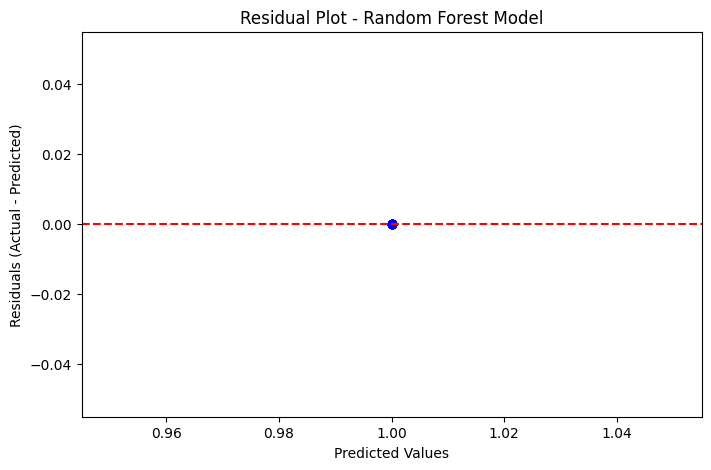

In [ ]:
#  Residual Plot for Random Forest
import matplotlib.pyplot as plt
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Random Forest Model")
plt.show()

/tmp/ipython-input-3034998711.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


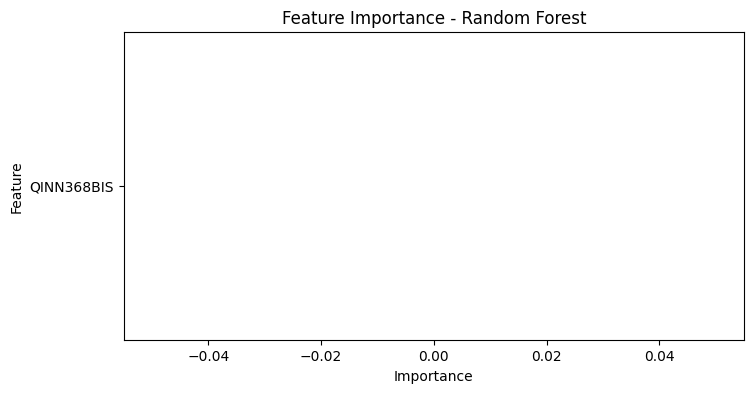

In [ ]:
#  Feature Importance (Random Forest)

importances = rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
#  Model Comparison Summary

model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf]
})
print("\n Model Comparison Summary:")
print(model_results)


 Model Comparison Summary:
               Model  R² Score  RMSE  MAE
0  Linear Regression       1.0   0.0  0.0
1      Random Forest       1.0   0.0  0.0
